# STAT 201: Group 29 Final Report
##### Brian Moniaga, Jiahe Jiang, Jiakang Huang, Nolan Vibhakar
##### Date: December 6th, 2023

## Import packages:

In [2]:
# Use the library function to load the R packages
library(tidyverse)
library(repr)
library(readxl)
library(cowplot)
library(RColorBrewer)
library(tidymodels)

## Introduction:
Investigating the factors that affect students' academic grades is a crucial area of research with significant implications for educational institutions, policymakers, and society as a whole. Understanding these factors can help us estimate educational outcomes for students. Several published journals and studies highlight the importance of this research area. One of these aspects is their impact on graduation rates. A study by Pascarella and Terenzini (2005) emphasizes that academic performance is a strong predictor of whether a student will complete their degree. Furthermore, investigating these factors can make us aware of educational inequalities. [A research paper by Reardon (2011) ](https://cepa.stanford.edu/sites/default/files/reardon%20whither%20opportunity%20-%20chapter%205.pdf) claims that students from different socioeconomic backgrounds often face disparities in academic achievement. Last but not least, Makewa et al.(2012) propose that parents might also have an impact on students' grades. To conduct further investigation, we obtained a dataset from UCI. This dataset considers 31 factors related to the academic success of 145 students, with a specific focus on the education level of students' parents. The students will be sorted based on whether they come from highly educated families (where at least one parent has gone to university) or not. By analyzing the data, we can accurately gauge students' academic success by examining their parents' educational background, with the criterion being that the student achieved a GPA exceeding 3 in the previous semester.

<img src="https://media3.giphy.com/media/IPbS5R4fSUl5S/giphy.gif?cid=ecf05e47x87f3pqmvs9tgypbylzin60fkzte2tcf7hhf1849&rid=giphy.gif&ct=g" width = "800"/>

Source: https://media3.giphy.com/media/IPbS5R4fSUl5S/giphy.gif

## Methods:

In our study, we aimed to assess the academic success of individual students by examining their parents' education levels. We categorized students into two groups: those from high-education families and those from low-education families. We defined a high-education family as one where at least one parent holds a university degree. To determine academic success, we utilized the students' last semester GPA, considering a GPA above 3.0 as a benchmark for academic achievement. We decided on this metric because we felt like it denoted a good threshhold for which students are perceived as acedemically successful. Our data came from UC Irvine, which is considered a top University in the US, so students with a 3.0 GPA or higher are clearly achieving a level of academic success as indicated by their grades.

In our initial analysis, we found that there were a large enough amount of students in each level of family education for the analysis to be appropriate. Additionally, we found that the proportions for our sample were really similar for each group. However, this is not enough to conclusively say that the education level of the family doesn't make a difference. Our sample size is relatively small, even in comparison to the entire UC Irvine student population, not to mention the entire population. Furthermore, our analysis does not provide insights into the accuracy of our results. Therefore, additional analyses are necessary to delve deeper into the relationship between family education level and academic success.

To determine the relationship between our two variaables, we will first coduct a hypothesis test by using boostrapping method. We will use $p_h$ to denote the proportion of students from high education families and $p_l$ to denote the proportion from low education families. Our hypotheses are as follows:
$$
H_0: p_h - p_l = 0 \\
H_A: p_h - p_l \neq 0
$$
In our hypothesis test, we will use $\alpha = 0.05$.

To further examine the relationship between our variables, we will employ a theory-based method to obtain an additional p-value. This approach will provide stronger evidence to support our conclusion and determine which group has a higher chance of academic success.

## Data Analysis:

To begin with, we organized the original dataset based on the **established criterions**.

In [3]:
# Read the CSV file
student_data <- read.csv("https://raw.githubusercontent.com/DanielHuangjiakang/STAT201-Group-Project_29/main/student.csv", header = TRUE) |>
    select(Mothers_Education, Fathers_Education, CGPA_Last_Semester) |>
    mutate(high_education_family = if_else(Mothers_Education > 3 | Fathers_Education > 3, TRUE, FALSE), 
          academically_successful = if_else(CGPA_Last_Semester > 3, TRUE, FALSE))


head(student_data, 5)
cat("Table 1: Student Data table")

,Mothers_Education,Fathers_Education,CGPA_Last_Semester,high_education_family,academically_successful
,<int>,<int>,<int>,<lgl>,<lgl>
1,1,2,1,FALSE,FALSE
2,2,3,2,FALSE,FALSE
3,2,2,2,FALSE,FALSE
4,1,2,3,FALSE,FALSE
5,3,3,2,FALSE,FALSE


Table 1: Student Data table

#### There are 145 students contained in this dataset
* `Mothers_Education`: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)
* `Fathers_Education`: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)
* `CGPA_Last_Semester`(/4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)
* `high_education_family`: A student is considered to be from a high-education family if **at least one** of their parents has attended university (FALSE: student is not from a high educated family, TRUE: student is from a high educated family)
* `academically_successful`: A student is considered academically successful if their GPA last semester was **3.0 or higher** (FALSE: student is considered not to be academically successful, TRUE: student is considered to be academically successful)

In [4]:
# Count the number of students sorted into two groups: high_education_family & academically_successful
Student_Tally <- 
    student_data |>
    group_by(high_education_family, academically_successful) |>
    tally()

# Calculate proportions of academically successful students for each family educational level
Student_Props <- tibble(low_education_family = 46/(46+56), high_education_family = 19/(24+19))

Student_Tally
Student_Props
cat("Table 2: Proportion of acedmically successful students from families with different level of education")

high_education_family,academically_successful,n
<lgl>,<lgl>,<int>
FALSE,FALSE,56
FALSE,TRUE,46
TRUE,FALSE,24
TRUE,TRUE,19


low_education_family,high_education_family
<dbl>,<dbl>
0.4509804,0.4418605


Table 2: Proportion of acedmically successful students from families with different level of education

Table 3: Summary of CGPA Last Semester grouped by Family Education Level

high_education_family,mean,sd
<lgl>,<dbl>,<dbl>
FALSE,3.186275,1.224586
TRUE,2.976744,1.471772


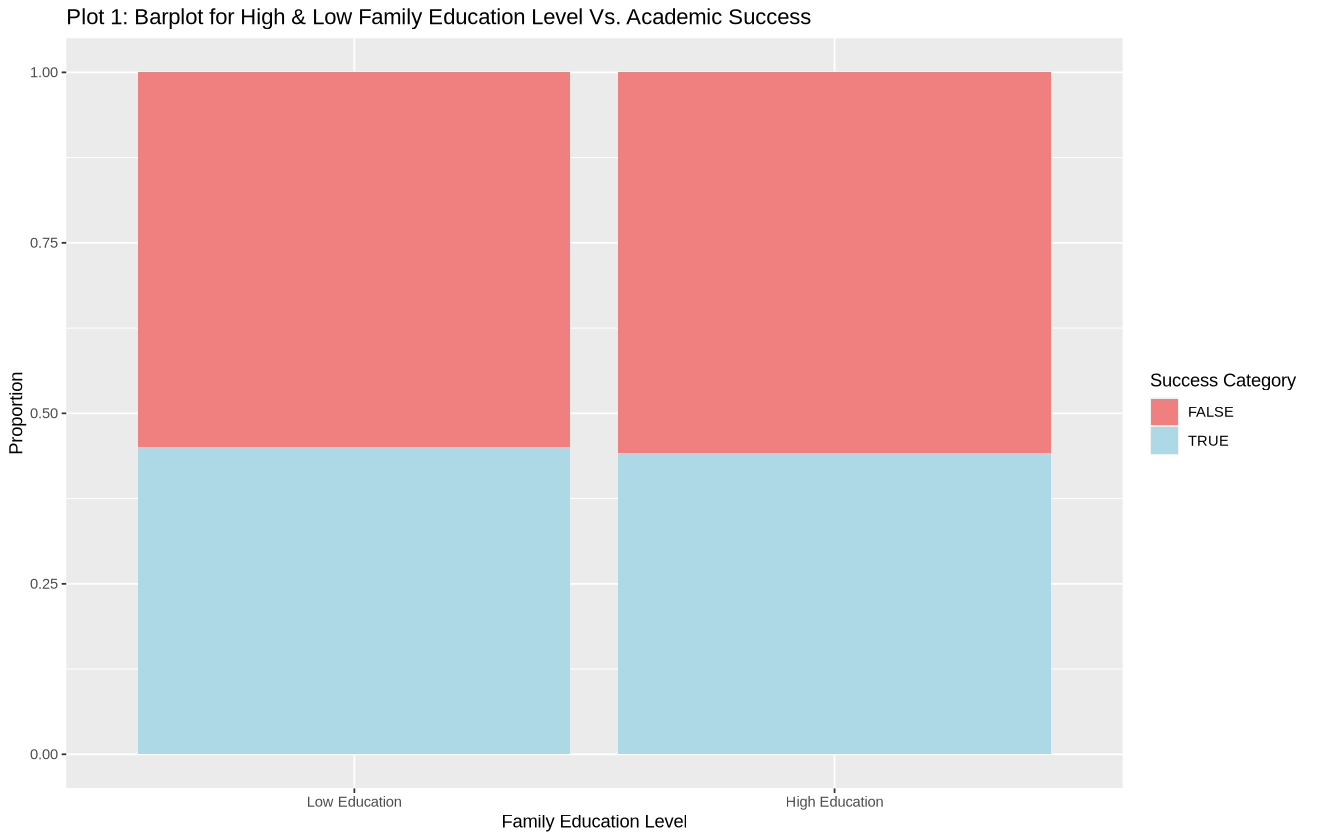

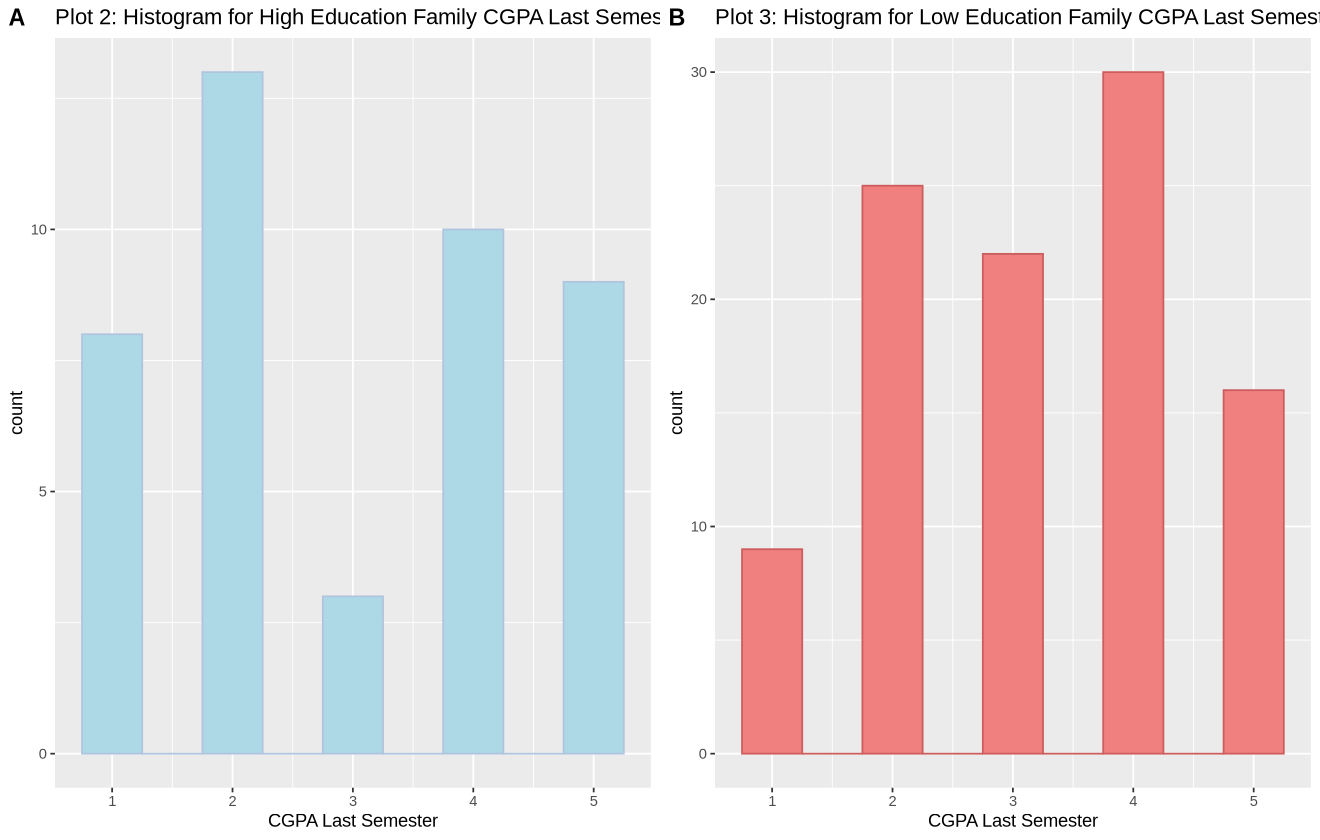

In [5]:
options(repr.plot.width = 11, repr.plot.height = 7) 
# Barplot for High & Low Family Education Level Vs. Academic Success
Student_Bar_Plot <- student_data |>
  ggplot(aes(x = high_education_family, fill = academically_successful)) +
  geom_bar(position = "fill") +
  scale_fill_manual(values = c("#f08080", "#add8e6")) +
  scale_x_discrete(labels = c("Low Education", "High Education")) +  # Change labels here
  labs(x = "Family Education Level", 
       fill = "Success Category",
       title = "Plot 1: Barplot for High & Low Family Education Level Vs. Academic Success") +
  ylab("Proportion")

# Histogram for High Education Family CGPA Last Semester
histogram_High_Education_CGPA_Last_Semester <- 
    student_data |>
    filter(high_education_family == TRUE) |> 
    ggplot(aes(x = CGPA_Last_Semester)) +
    geom_histogram(binwidth = 0.5, fill = "#add8e6", color = "#b0c4de") + 
    labs(x = "CGPA Last Semester", title = "High Education Families") +
    ggtitle("Plot 2: Histogram for High Education Family CGPA Last Semester")

# Histogram for Low Education Family CGPA Last Semester
histogram_Low_Education_CGPA_Last_Semester <- 
    student_data |>
    filter(high_education_family == FALSE) |> 
    ggplot(aes(x = CGPA_Last_Semester)) +
    geom_histogram(binwidth = 0.5, fill = "#f08080", color = "#cd5c5c") + 
    labs(x = "CGPA Last Semester", title = "Low Education Families") +
    ggtitle("Plot 3: Histogram for Low Education Family CGPA Last Semester")


summaries_family_edu <- student_data |>
    group_by(high_education_family) |>
    summarise(mean = mean(CGPA_Last_Semester, na.rm = TRUE),
              sd = sd(CGPA_Last_Semester, na.rm = TRUE))

plot_grid <- plot_grid(histogram_High_Education_CGPA_Last_Semester, 
                       histogram_Low_Education_CGPA_Last_Semester,
                       labels = "AUTO", ncol = 2, align = 'h') 

Student_Bar_Plot
cat("Table 3: Summary of CGPA Last Semester grouped by Family Education Level")
summaries_family_edu
plot_grid

Based on Table 3, it appears that there may be a trend suggesting that students from families with lower educational backgrounds tend to achieve a higher CGPA compared to students from families with higher educational levels. The data visualizations, presented in the form of barplots and histograms, offer some evidence supporting this potential trend.

## Hypothesis Tests:

First we will conduct a hypothesis test with the hypotheses:
$$
H_0: p_h - p_l = 0\\
h_A: p_h - p_l \neq 0
$$

$p_h$ represents the possibility of students from high-education families achieving academic success, while $p_l$ signifies the possibility of students from low-education families achieving academic success.

To do this, we will employ both **bootstrapping** and **theory-based** methods to calculate the p-value. We will assess the p-value using a significance level of **0.05** and compare the results of two hypothesis tests.

### The Bootstrapping method:

P-value: 1 
Table 4: Confidence interval for Null Distribution

lower_ci,upper_ci
<dbl>,<dbl>
-0.1744186,0.1892385


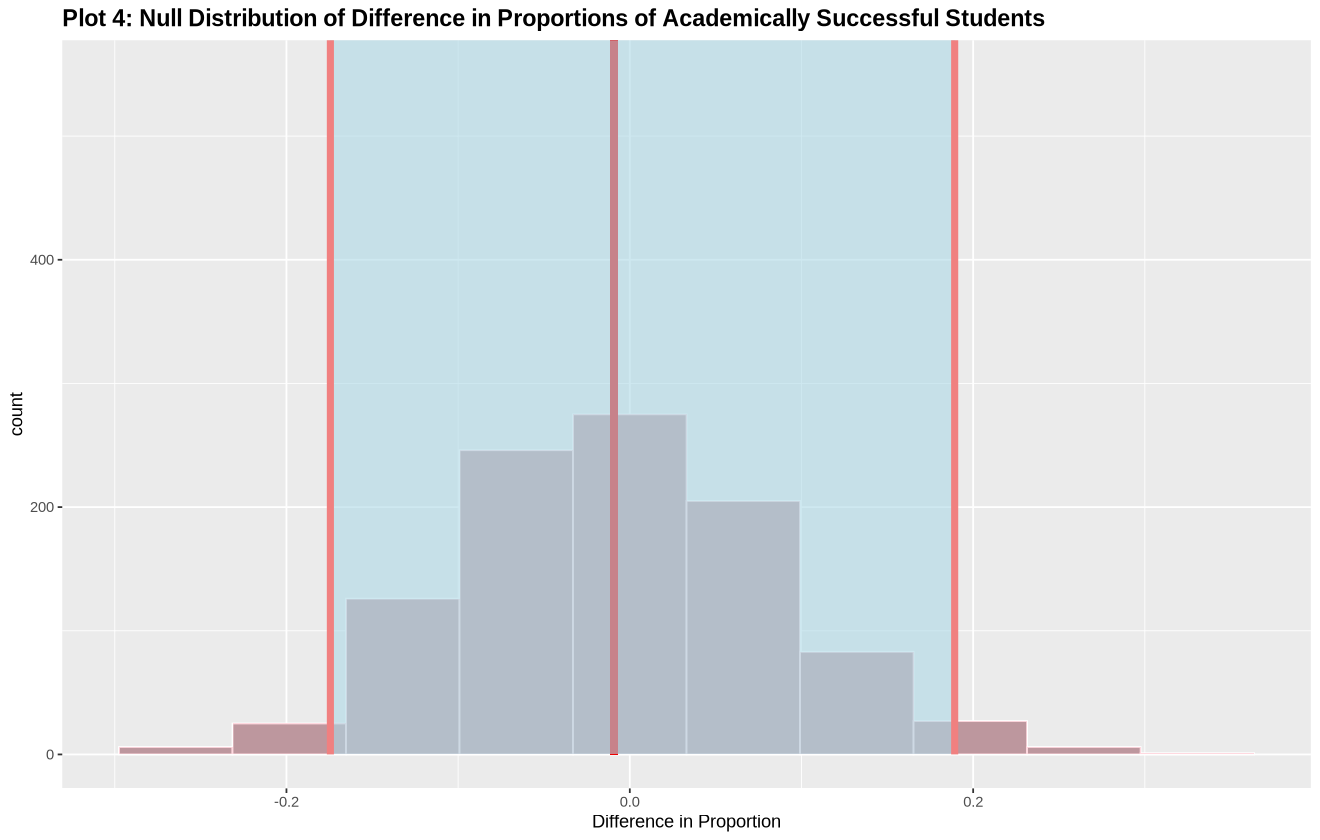

In [6]:
# Setting the seed to ensure reproducibility of results
set.seed(123)

# Obtain the null distribution
null_dist <- student_data |>
    specify(academically_successful ~ high_education_family, success = "TRUE") |>
    hypothesize(null = "independence") |>
    generate(reps = 1000, type = "permute") |>
    calculate(stat = "diff in props", order = c("TRUE","FALSE"))

# Find the difference in proportions of high and low education families that are academically successful
obs_diff_props <- student_data |>
    specify(academically_successful ~ high_education_family, success = "TRUE") |>
    calculate(stat = "diff in props", order = c("TRUE","FALSE"))

# Obtain the 95% confidence interval for Null distribution
confidence_intervel <- null_dist |>
    get_ci(level = 0.95, type = "percentile")

# Obtain the p-value
p_value <- null_dist |>
    get_p_value(obs_stat = obs_diff_props, direction = "both") |>
    pull()

# Visualize the null distribution, shade the p-value
null_dist_histogram <- visualize(null_dist, bins = 10) +
    shade_p_value(obs_stat = obs_diff_props, direction = "both") + 
    shade_ci(endpoints = confidence_intervel, color = "#f08080", fill = "#add8e6") +
    labs(x = "Difference in Proportion") +
    ggtitle("Plot 4: Null Distribution of Difference in Proportions of Academically Successful Students") +
    theme(plot.title = element_text(face = "bold", size = 14)) 

null_dist_histogram
cat("P-value:", p_value, "\n")
cat("Table 4: Confidence interval for Null Distribution")
confidence_intervel

The p-value obtained through the bootstrapping method is **1**. Given a significance level of 0.05, we **do not** have sufficient evidence to reject the null hypothesis $H_0$. For the confidence interval with a confidence level of 0.95, the endpoints are **-0.174418** and **0.1892385**.

### The Theory based method:

In [7]:
# Obtain counts for each group
Student_Tally

high_education_family,academically_successful,n
<lgl>,<lgl>,<int>
FALSE,FALSE,56
FALSE,TRUE,46
TRUE,FALSE,24
TRUE,TRUE,19


Check for the Central Limit Theorem (CLT) in the context of proportions, we need to verify that both np and n(1−p) are greater than 10. 

In [8]:
# The requirement test for CLT
CLT_test_High_np <- 43*(19/43)
CLT_test_High_n1p <- 43*(1-19/43)

CLT_test_Low_np <- 102*(46/102)
CLT_test_Low_n1p <- 102*(1-46/102)

cat("For the High Education Family Group np:", CLT_test_High_np, "\n")
cat("For the High Education Family Group n(1−p):", CLT_test_High_n1p, "\n")
cat("For the Low Education Family Group np:", CLT_test_Low_np, "\n")
cat("For the Low Education Family Group n(1−p):", CLT_test_Low_n1p, "\n")

For the High Education Family Group np: 19 
For the High Education Family Group n(1−p): 24 
For the Low Education Family Group np: 46 
For the Low Education Family Group n(1−p): 56 


Since the **proportions** and **population sizes** for both of satisfy the requirements for the **CLT**, we can apply theory based approaches.

In [9]:
# Use built in prop.test function to obtain p-value
p_value_prop_test <- tidy (
    prop.test(x = c(19,46), 
    n = c(43,102), 
    correct = FALSE)
)

p_value <- p_value_prop_test |>
    pull(p.value)

cat("Table 5: Proportion Test Results for Academic Success by Family Education Level\n")
p_value_prop_test
cat("P-value:", p_value, "\n")

Table 5: Proportion Test Results for Academic Success by Family Education Level


estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.4418605,0.4509804,0.01017223,0.9196636,1,-0.1861988,0.167959,2-sample test for equality of proportions without continuity correction,two.sided


P-value: 0.9196636 


The p-value obtained through the theory method is **0.9197**. Given a significance level of 0.05, we **do not** have sufficient evidence to reject the null hypothesis $H_0$. Additionally, the confidence interval has the endpoints **-0.1861988** and **0.167959**. We obtain different p-values and a different confidence interval as they are derived through different methods. Nevertheless, the conclusion remains unchanged, as we do not reject the null hypothesis $H_0$ in either case, and the confidence interval is relatively very small in both cases. We don't think one is more trustworthy than the other.

## Discussion:

In our study, we aimed to assess the academic success of individual students by examining their parents' education levels.
From the analysis that we did, we received a p-value of **1** and **0.9197** using different methods. Since we are using a significance level of **0.05** we fail to reject the null hypothesis $H_0$ using both of these methods. This implies that we fail to conclude that the academic success of an individual is influenced by their parents' education level. This is inline from our initial analysis where we did not notice a significant difference.

Additionally, our findings also challenge the common stereotype and public perception regarding the correlation between parental education levels and a child's educational achievements. This is an interesting finding as it could potentially help combat discrimination amongst students with different parental education levels.

While we fail to reject the null hypothesis it does not necessarilly mean that we accept the null hypothesis, rather our study can be further improved by increasing our sample size by surverying more students as well as expanding the range where we get our data and sampling from different schools/universities. These improvements would allow our data to be more representative of our intended population, reducing bias and would provide a more rigorous analysis. Moreover, an article by Vasich (2023) showed that UCI is highly ranked in terms of social mobility and graduation rate for people who received financial assistance which is typically associated with students with lower parental education level. This could imply that UCI is aware of the association between parental education level and students' success and that they have handled the situation very well. If this is true, then our further improvements of branching out to different schools/universities would provide insightful data regarding this issue.

Further questions that arise from this findings are whether or not different variables aside from parental education plays a role in affecting a student's academic performance. Other questions include whether this issue can be found in other universities aside from UCI. These questions in itself can be investigated with similar methods to what we did.

## Work Cited:
1. Makewa, L. N., Role, E., & Otewa, F. (2012). Parental factors affecting academic achievement of grade six pupils in Kisumu city, Kenya. International Journal of Asian Social Science, 2(11), 1984-1997.

2. Pascarella, E. T., & Terenzini, P. T. (2005). How College Affects Students: A Third Decade of Research. Volume 2. Jossey-Bass, An Imprint of Wiley. 10475 Crosspoint Blvd, Indianapolis, IN 46256.

3. Reardon, S. F. (2011). The widening academic achievement gap between the rich and the poor: New evidence and possible explanations. Whither opportunity, 1(1), 91-116.

4. Yilmaz,Nevriye and Şekeroğlu,Boran. (2023). Higher Education Students Performance Evaluation. UCI Machine Learning Repository. https://doi.org/10.24432/C51G82.

5. Vasich, T. (2023). UCI is ranked among nation’s top 10 public universities for ninth year in a row. UCI News. https://news.uci.edu/2023/09/18/uc-irvine-is-ranked-among-nations-top-10-public-universities-for-ninth-year-in-a-row/ 